In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [75]:
path = r"CBS.csv"

data = pd.read_csv(path,sep=';',skiprows=[0, 1, 2, 3 ],header=[0, 1, 2],index_col=[0])
data = data.replace(',', '.', regex=True)

data = data.dropna(thresh=data.shape[1] - 1)
data = data.drop('Unnamed: 1_level_0',axis=1,level=0)
data.index = data.index.str.replace('*', '', regex=False)
display(data)



Vervoerwijzen  \
                                       Onderwerp   
Perioden                            Reismotieven   
1999                                      Totaal   
1999                        Van en naar het werk   
1999                 Winkelen. boodschappen doen   
1999      Onderwijs volgen. cursus. kinderopvang   
1999                                  Vrije tijd   
...                                          ...   
2019                        Van en naar het werk   
2019                 Winkelen. boodschappen doen   
2019      Onderwijs volgen. cursus. kinderopvang   
2019                                  Vrije tijd   
2019                        Overige reismotieven   

                                         Totaal  \
         Ritten per persoon per dag (gemiddeld)   
Perioden                                 aantal   
1999                                       3.41   
1999                                       0.59   
1999                                       0.73   
1999                                        0.3   
1999                                       1.19   
...                                         ...   
2019                                       0.61   
2019                                       0.57   
2019                                       0.28   
2019                                       1.05   
2019                                       0.45   

                                                                 \
         Afgelegde afstand per rit (gemiddeld) Reisduur per rit   
Perioden                                    km          Minuten   
1999                                     10.96            23.72   
1999                                     14.78            24.83   
1999                                      4.96            14.97   
1999                                      6.85            17.64   
1999                                     12.42            31.37   
...                                        ...              ...   
2019                                     16.13            24.83   
2019                                      5.36            14.35   
2019                                      7.28            18.58   
2019                                      13.5            32.59   
2019                                     11.87            19.57   

                              Auto (bestuurder)  \
         Ritten per persoon per dag (gemiddeld)   
Perioden                                 aantal   
1999                                       1.06   
1999                                       0.23   
1999                                       0.23   
1999                                       0.02   
1999                                       0.31   
...                                         ...   
2019                                       0.25   
2019                                        0.2   
2019                                       0.01   
2019                                       0.26   
2019                                       0.21   

                                                                 \
         Afgelegde afstand per rit (gemiddeld) Reisduur per rit   
Perioden                                    km          Minuten   
1999                                     16.16            23.91   
1999                                     20.62            28.76   
1999                                      6.94            14.57   
1999                                     21.61            25.68   
1999                                     18.15             27.9   
...                                        ...              ...   
2019                                     24.99            30.38   
2019                                      7.78            14.86   
2019                                     26.09            33.31   
2019                                     22.07            29.47   
2019                                     16.31            22.08   

In [76]:

totaal = data.iloc[:,[0, 1, 2, 3]]
Bestuurder = data.iloc[:,[0, 4, 5, 6]]
Passagier = data.iloc[:,[0, 7, 8, 9]]
Trein = data.iloc[:,[0, 10, 11, 12]]
BTM = data.iloc[:,[0, 13, 14, 15]]
Fiets = data.iloc[:,[0, 16, 17, 18]]
Lopen = data.iloc[:,[0, 19, 20, 21]]
Overige = data.iloc[:,[0, 22, 23, 24]]

# Create a list of the datasets you want to process
datasets = [totaal, Bestuurder, Passagier, Trein, BTM, Fiets, Lopen, Overige]

# Iterate over each dataset
for df in datasets:
    # Drop the first two levels of the column index (if applicable)
    df.columns = df.columns.droplevel([0, 1])
    
    # Convert relevant columns to numeric, handling errors
    df['aantal'] = pd.to_numeric(df['aantal'], errors='coerce')
    df['km'] = pd.to_numeric(df['km'], errors='coerce')
    df['Minuten'] = pd.to_numeric(df['Minuten'], errors='coerce')
    
    # Calculate 'snelheid' (speed) by dividing distance by time in hours
    df['snelheid'] = df['km'] / (df['Minuten'] / 60)
    
print(Fiets)

Vervoerwijzen  \
                                       Onderwerp   
Perioden                            Reismotieven   
1999                                      Totaal   
1999                        Van en naar het werk   
1999                 Winkelen. boodschappen doen   
1999      Onderwijs volgen. cursus. kinderopvang   
1999                                  Vrije tijd   
...                                          ...   
2019                        Van en naar het werk   
2019                 Winkelen. boodschappen doen   
2019      Onderwijs volgen. cursus. kinderopvang   
2019                                  Vrije tijd   
2019                        Overige reismotieven   

                           Overige vervoerwijze  \
         Ritten per persoon per dag (gemiddeld)   
Perioden                                 aantal   
1999                                       0.12   
1999                                       0.05   
1999                                       0.01   
1999                                       0.01   
1999                                       0.03   
...                                         ...   
2019                                       0.04   
2019                                       0.01   
2019                                       0.01   
2019                                       0.03   
2019                                       0.01   

                                                                 
         Afgelegde afstand per rit (gemiddeld) Reisduur per rit  
Perioden                                    km          Minuten  
1999                                     17.13            32.31  
1999                                     17.77            27.97  
1999                                      6.61            16.83  
1999                                      9.96            28.17  
1999                                     16.92            45.59  
...                                        ...              ...  
2019                                     21.54            29.36  
2019                                      5.61            15.99  
2019                                     11.64            27.59  
2019                                     19.79            45.64  
2019                                     17.78            29.11  

[126 rows x 4 columns]

[4,
 10,
 16,
 22,
 28,
 34,
 40,
 46,
 52,
 58,
 64,
 70,
 76,
 82,
 88,
 94,
 100,
 106,
 112,
 118,
 124]

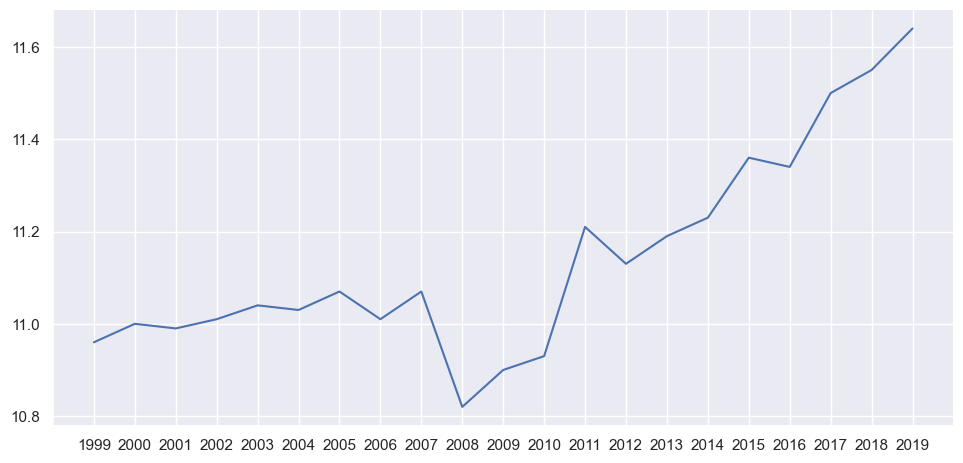

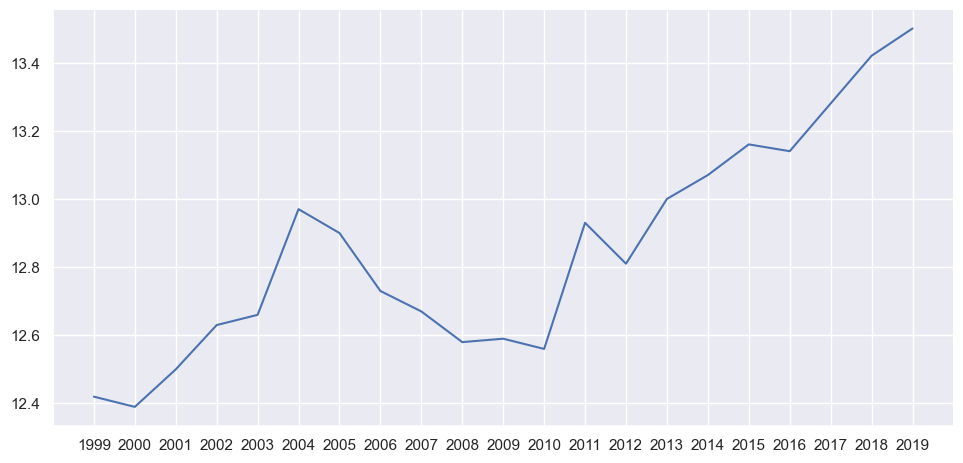

In [97]:
totaal_totaal = []
totaal_vrijetijd = []

for i in range(len(totaal)):
    if totaal.iloc[i,0] == 'Totaal':
        totaal_totaal.append(i)
    if totaal.iloc[i,0] == 'Vrije tijd':
        totaal_vrijetijd.append(i)
display(totaal_vrijetijd)

    
totaalTotaal = totaal.iloc[totaal_totaal,:]
totaalVrijetijd = totaal.iloc[totaal_vrijetijd,:]
totaalTotaal.reset_index(inplace=True)
totaalVrijetijd.reset_index(inplace=True)

a = np.array(totaalTotaal.iloc[:,0])
b = pd.to_numeric(np.array(totaalTotaal.iloc[:,3]))
c = pd.to_numeric(np.array(totaalVrijetijd.iloc[:,3]))
sns.relplot(x=a, y=b, kind="line", aspect=2)
sns.relplot(x=a, y=c, kind="line", aspect=2)

        